In [1]:
from google.colab import drive
drive.mount('/content/drive')

# now can import drive files as usual files with the path like
# /content/drive/My Drive/location_of_the_file

Mounted at /content/drive


#Reality Checker#


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import  display, HTML
import itertools

PP_RECIPES_PATH = r"/content/drive/My Drive/Data Mining/data/our_pp_recipes.csv"
PP_RECIPES_DF = pd.read_csv(PP_RECIPES_PATH, encoding="utf-8")

class RealityChecker:
    def __init__(self, df, col_name):
        self.df = df
        self.col_name = col_name
        self.series = df[col_name]
        print(self.series)
        print(self.series.values[0])
        self.values_type = type(self.series.values[0])

    def change_column(self, new_col_name):
        self.col_name = new_col_name
        self.series = self.df[new_col_name]
        self.values_type = type(self.series.values[0])

    def show_table(self, col1_name, col2_name, general_col_name="recipe_id"): # shows intersections table between 2 cols
        table_data = self.df.groupby([col1_name, col2_name])[general_col_name].count().unstack()
        table_data = table_data.fillna(0).astype(int)
        display(table_data)
    
    def check_range_portion(self, range_min, range_max):
        if isinstance(self.series.values[0], (int, np.int64)) or isinstance(self.series.values[0], float):
            range_len = len(self.series.loc[(self.series >= range_min) & (self.series <= range_max)])
            total_len = len(self.series)
            range_portion = range_len / float(total_len)
            print("The range of {0} to {1} (inclusive) in the {2} column is {3} of the records".format(range_min, range_max, self.col_name, range_portion))
        else:
          print("not a number field")

    def preform_check(self, col_name=None, bins=None):
        if col_name:
            self.change_column(col_name)

        print("Reality Check For {0} Column".format(self.col_name))

        if isinstance(self.series.values[0], (int, np.int64)):
            self._check_int(bins)
        elif isinstance(self.series.values[0], float):
            self._check_float(bins)
        elif isinstance(self.series.values[0], str):
            self._check_string(bins)
        elif isinstance(self.series.values[0], list):
            self._check_list(bins)
        else:
            print("Not found a matching check for type {0}".format(self.values_type))

    def _present_displot(self, bins):
        plt.figure()
        if bins:
            ax1 = sns.distplot(self.series, bins=bins)
            plt.figure()
            ax2 = sns.distplot(self.series, bins=bins)
            ax2.set_xscale("log")
        else:
            ax1 = sns.distplot(self.series)
            plt.figure()
            ax2 = sns.distplot(self.series)
            ax2.set_xscale("log")
        plt.show()

    def _check_int(self, bins):
        description = self.series.describe()
        unique_values = self.series.unique()
        unique_values_amount = len(unique_values)
        values_freqs = self.series.value_counts()

        print("Description of Column:")
        print(description)

        print("\n There Are {0} unique values. Their Frequency list:".format(unique_values_amount))
        print(values_freqs)

        self._present_displot(bins)

    def _check_float(self, bins):
        self._check_int(bins)

    def _check_string(self, bins):
        description = self.series.describe()

        values_len_col = self.col_name + "_len"
        self.df[values_len_col] = self.df[self.col_name].apply(lambda x: len(x))

        min_len, max_len = (self.df[values_len_col].min(), self.df[values_len_col].max())

        min_lens_strings = self.df.loc[self.df[values_len_col] == min_len][self.col_name]
        max_lens_strings = self.df.loc[self.df[values_len_col] == max_len][self.col_name]

        print("Description of Column:")
        print(description)

        print("\n Strings With Minimal Length:")
        print(min_lens_strings)
        print("\n Strings With Maximal Length:")
        print(max_lens_strings)

        self._present_displot(bins)

        # cloud of words

    def _check_list(self, bins):
        description = self.series.describe()
        in_list_element_type = type(self.series.values[0][0])

        lists_len_col = self.col_name + "_len"
        self.df[lists_len_col] = self.df[self.col_name].apply(lambda x: len(x))

        lens_value_counts = self.df[lists_len_col].value_counts()

        min_len, max_len = (self.df[lists_len_col].min(), self.df[lists_len_col].max())

        min_lens_lists = self.df.loc[self.df[lists_len_col] == min_len][self.col_name]
        max_lens_lists = self.df.loc[self.df[lists_len_col] == max_len][self.col_name]

        print("Type of element inside the List:")
        print(in_list_element_type)

        print("\n Description of Column:")
        print(description)
        print("\n Value Counts of lists lengths:")
        print(lens_value_counts)
        print("\n Lists With Minimal Length:")
        print(min_lens_lists)
        print("\n Lists With Maximal Length:")
        print(max_lens_lists)

        self._in_list_vals_investigate(in_list_element_type)
        self._present_displot(bins)

    def _in_list_vals_investigate(self, in_list_element_type):
        df_in_list_vals = pd.DataFrame({"vals": itertools.chain.from_iterable(self.series.tolist())})
        in_list_vals_description = df_in_list_vals["vals"].describe()

        print("\n Description of in list Values:")
        print(in_list_vals_description)

        if isinstance(in_list_element_type, str):
            df_in_list_vals["vals_len"] = df_in_list_vals["vals"].str.len()
            min_len, max_len = (df_in_list_vals["vals_len"].min(), df_in_list_vals["vals_len"].max())
            min_lens_strs = df_in_list_vals.loc[df_in_list_vals["vals_len"] == min_len]["vals"]
            max_lens_strs = df_in_list_vals.loc[df_in_list_vals["vals_len"] == max_len]["vals"]

            print("\n In Lists Strings Values With Minimal Length:")
            print(min_lens_strs)
            print("\n In Lists Strings Values With Maximal Length:")
            print(max_lens_strs)

        elif isinstance(in_list_element_type, float) or isinstance(in_list_element_type, int):
            in_list_unique_amount = len(df_in_list_vals["vals"].unique())
            in_list_value_counts = df_in_list_vals["vals"].value_counts()

            print("\n There Are {0} unique values. Their Frequency list:".format(in_list_unique_amount))
            print(in_list_value_counts)

        else:
            print("\n not found method to investigate in list type of {0}".format(in_list_element_type))



## Calories

0          51.5
1         173.4
2         269.8
3         368.1
4         352.9
          ...  
231632    415.2
231633     14.8
231634     59.2
231635    188.0
231636    174.9
Name: calories, Length: 231637, dtype: float64
51.5
Reality Check For calories Column
Description of Column:
count    231637.000000
mean        473.942425
std        1189.711374
min           0.000000
25%         174.400000
50%         313.400000
75%         519.700000
max      434360.200000
Name: calories, dtype: float64

 There Are 21479 unique values. Their Frequency list:
105.0     70
226.2     69
143.2     68
156.2     68
123.0     67
          ..
3221.2     1
3583.2     1
2255.8     1
2646.4     1
1910.9     1
Name: calories, Length: 21479, dtype: int64


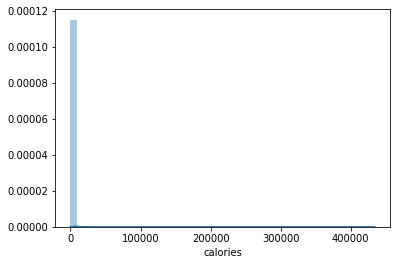

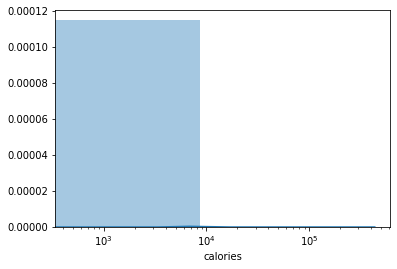

The range of 1000 to 10000000000000 (inclusive) in the calories column is 0.07245388258352509 of the records


In [ ]:
calories_check = RealityChecker(PP_RECIPES_DF, 'calories') 
calories_check.preform_check()

In [ ]:
calories_check.check_range_portion(0, 1500)

The range of 0 to 1500 (inclusive) in the calories column is 0.9606669055461778 of the records


0          51.5
1         173.4
2         269.8
3         368.1
4         352.9
          ...  
231632    415.2
231633     14.8
231634     59.2
231635    188.0
231636    174.9
Name: calories, Length: 222526, dtype: float64
51.5
Reality Check For calories Column
Description of Column:
count    222526.000000
mean        364.000554
std         266.698748
min           0.000000
25%         169.300000
50%         301.200000
75%         486.000000
max        1499.900000
Name: calories, dtype: float64

 There Are 13735 unique values. Their Frequency list:
105.0     70
226.2     69
143.2     68
156.2     68
104.0     67
          ..
1067.7     1
1135.8     1
1068.3     1
1390.1     1
1426.2     1
Name: calories, Length: 13735, dtype: int64


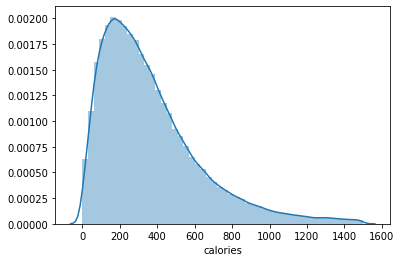

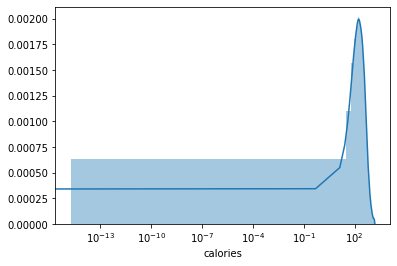

In [ ]:
main_calories = RealityChecker(PP_RECIPES_DF.loc[(PP_RECIPES_DF['calories'] >= 0) & (PP_RECIPES_DF['calories'] <= 1500)] , 'calories').preform_check()

8         4270.8
9         2669.3
23        1663.3
32        1649.8
47        5467.4
           ...  
231553    2041.6
231570    2116.3
231577    2954.6
231583    9282.1
231609    2641.4
Name: calories, Length: 9111, dtype: float64
4270.8
Reality Check For calories Column
Description of Column:
count      9111.000000
mean       3159.149841
std        5171.586187
min        1500.200000
25%        1837.750000
50%        2428.900000
75%        3541.100000
max      434360.200000
Name: calories, dtype: float64

 There Are 7744 unique values. Their Frequency list:
1548.0    7
2170.1    6
1909.4    5
1642.1    5
1845.5    4
         ..
3093.2    1
3692.1    1
1693.1    1
2573.5    1
3584.0    1
Name: calories, Length: 7744, dtype: int64


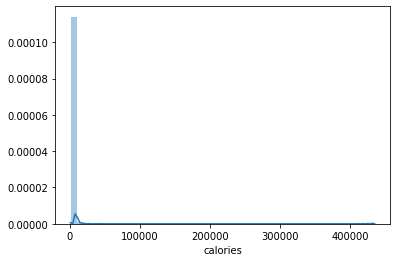

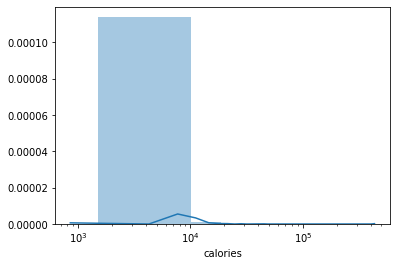

In [ ]:
tail_calories = RealityChecker(PP_RECIPES_DF.loc[(PP_RECIPES_DF['calories'] >= 1500)] , 'calories').preform_check()

## Total fat (PDV)

0          0.0
1         18.0
2         22.0
3         17.0
4          1.0
          ... 
231632    26.0
231633     0.0
231634     6.0
231635    11.0
231636    14.0
Name: total_fat_pdv, Length: 231637, dtype: float64
0.0
Reality Check For total_fat_pdv Column
Description of Column:
count    231637.00000
mean         36.08070
std          77.79884
min           0.00000
25%           8.00000
50%          20.00000
75%          41.00000
max       17183.00000
Name: total_fat_pdv, dtype: float64

 There Are 920 unique values. Their Frequency list:
0.0       16770
1.0        5834
6.0        5689
7.0        5647
5.0        5609
          ...  
857.0         1
674.0         1
2713.0        1
678.0         1
894.0         1
Name: total_fat_pdv, Length: 920, dtype: int64


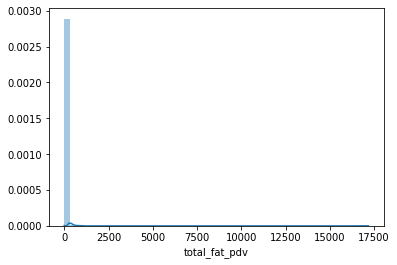

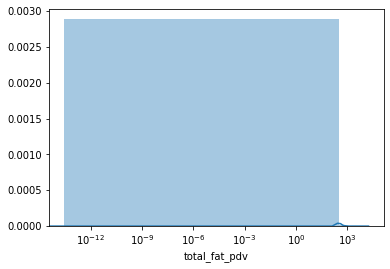

In [ ]:
total_fat_check = RealityChecker(PP_RECIPES_DF, 'total_fat_pdv')
total_fat_check.preform_check()

In [ ]:
total_fat_check.check_range_portion(0, 120)

The range of 0 to 120 (inclusive) in the total_fat_pdv column is 0.9552791652456214 of the records


0          0.0
1         18.0
2         22.0
3         17.0
4          1.0
          ... 
231632    26.0
231633     0.0
231634     6.0
231635    11.0
231636    14.0
Name: total_fat_pdv, Length: 229968, dtype: float64
0.0
Reality Check For total_fat_pdv Column
Description of Column:
count    229968.000000
mean         32.037505
std          41.212858
min           0.000000
25%           8.000000
50%          20.000000
75%          40.000000
max         350.000000
Name: total_fat_pdv, dtype: float64

 There Are 351 unique values. Their Frequency list:
0.0      16770
1.0       5834
6.0       5689
7.0       5647
5.0       5609
         ...  
326.0        8
329.0        7
337.0        5
341.0        5
348.0        4
Name: total_fat_pdv, Length: 351, dtype: int64


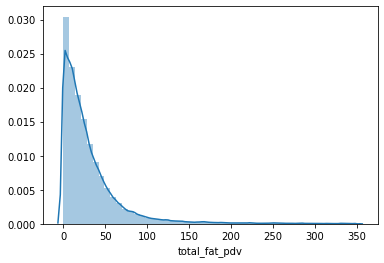

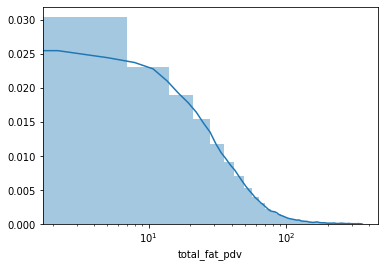

In [ ]:
main_total_fat = RealityChecker(PP_RECIPES_DF.loc[(PP_RECIPES_DF['total_fat_pdv'] >= 0) & (PP_RECIPES_DF['total_fat_pdv'] <= 350)] , 'total_fat_pdv').preform_check()

47        516.0
94        470.0
96        653.0
129       427.0
253       491.0
          ...  
230969    399.0
231045    464.0
231062    604.0
231266    404.0
231377    481.0
Name: total_fat_pdv, Length: 1669, dtype: float64
516.0
Reality Check For total_fat_pdv Column
Description of Column:
count     1669.000000
mean       593.183942
std        541.811746
min        351.000000
25%        402.000000
50%        481.000000
75%        631.000000
max      17183.000000
Name: total_fat_pdv, dtype: float64

 There Are 569 unique values. Their Frequency list:
353.0     15
365.0     14
354.0     14
363.0     14
367.0     13
          ..
2440.0     1
1104.0     1
1176.0     1
728.0      1
685.0      1
Name: total_fat_pdv, Length: 569, dtype: int64


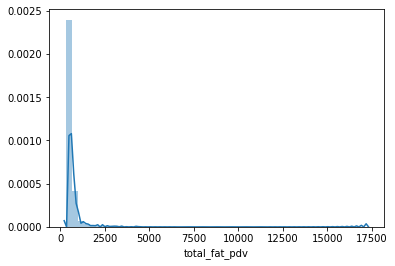

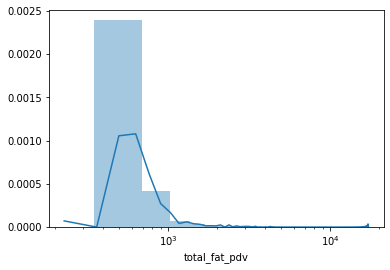

In [ ]:
tail_total_fat = RealityChecker(PP_RECIPES_DF.loc[(PP_RECIPES_DF['total_fat_pdv'] >= 350)]  , 'total_fat_pdv').preform_check()

## Sugar (PDV)

0          13.0
1           0.0
2          32.0
3          10.0
4         337.0
          ...  
231632     34.0
231633      2.0
231634      2.0
231635     57.0
231636     33.0
Name: sugar_pdv, Length: 231637, dtype: float64
13.0
Reality Check For sugar_pdv Column
Description of Column:
count    231637.000000
mean         84.296865
std         800.080897
min           0.000000
25%           9.000000
50%          25.000000
75%          68.000000
max      362729.000000
Name: sugar_pdv, dtype: float64

 There Are 2449 unique values. Their Frequency list:
0.0       10322
1.0        6232
6.0        5576
2.0        5491
4.0        5371
          ...  
5841.0        1
1694.0        1
3459.0        1
1117.0        1
3114.0        1
Name: sugar_pdv, Length: 2449, dtype: int64


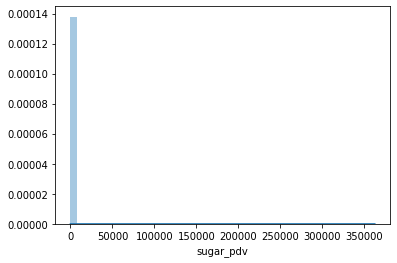

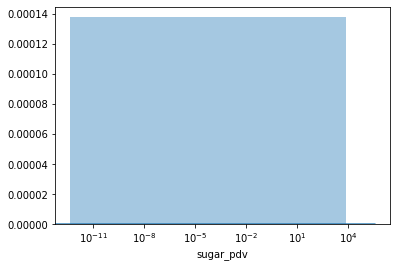

In [ ]:
sugar_check = RealityChecker(PP_RECIPES_DF, 'sugar_pdv')
sugar_check.preform_check()

In [ ]:
sugar_check.check_range_portion(0, 250)

The range of 0 to 250 (inclusive) in the sugar_pdv column is 0.945643398938857 of the records


0         13.0
1          0.0
2         32.0
3         10.0
5         55.0
          ... 
231632    34.0
231633     2.0
231634     2.0
231635    57.0
231636    33.0
Name: sugar_pdv, Length: 219046, dtype: float64
13.0
Reality Check For sugar_pdv Column
Description of Column:
count    219046.000000
mean         42.306771
std          50.160925
min           0.000000
25%           9.000000
50%          22.000000
75%          56.000000
max         250.000000
Name: sugar_pdv, dtype: float64

 There Are 251 unique values. Their Frequency list:
0.0      10322
1.0       6232
6.0       5576
2.0       5491
4.0       5371
         ...  
244.0       60
246.0       53
245.0       53
243.0       53
247.0       51
Name: sugar_pdv, Length: 251, dtype: int64


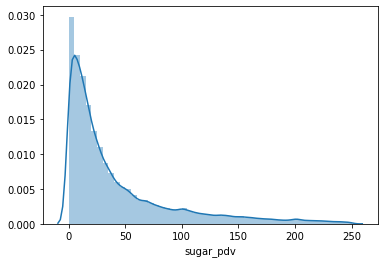

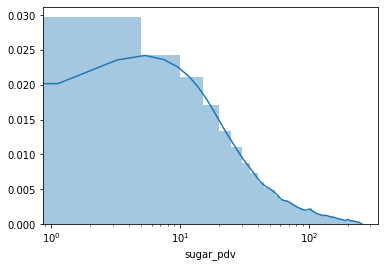

In [ ]:
main_sugar = RealityChecker(PP_RECIPES_DF.loc[(PP_RECIPES_DF['sugar_pdv'] >= 0) & (PP_RECIPES_DF['sugar_pdv'] <= 250)] , 'sugar_pdv').preform_check()

4          337.0
7          378.0
8         1306.0
9          976.0
47        1196.0
           ...  
231570     675.0
231573     284.0
231577     806.0
231583     340.0
231615     527.0
Name: sugar_pdv, Length: 12655, dtype: float64
337.0
Reality Check For sugar_pdv Column
Description of Column:
count     12655.000000
mean        811.943422
std        3333.819143
min         250.000000
25%         319.500000
50%         495.000000
75%         929.000000
max      362729.000000
Name: sugar_pdv, dtype: float64

 There Are 2199 unique values. Their Frequency list:
269.0      76
268.0      71
252.0      68
270.0      67
250.0      64
           ..
2110.0      1
10365.0     1
1580.0      1
3603.0      1
3079.0      1
Name: sugar_pdv, Length: 2199, dtype: int64


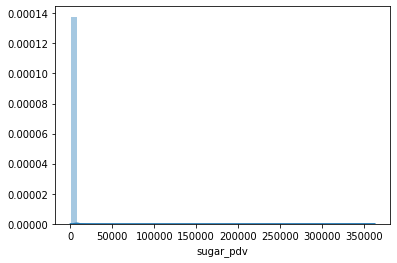

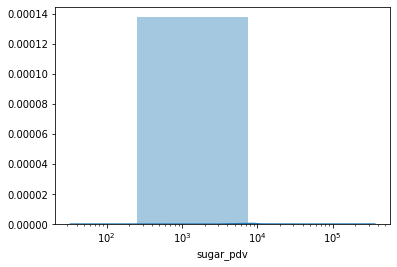

In [ ]:
tail_sugar = RealityChecker(PP_RECIPES_DF.loc[(PP_RECIPES_DF['sugar_pdv'] >= 250)], 'sugar_pdv').preform_check()

## Sodium (PDV)

0          0.0
1         17.0
2         48.0
3          2.0
4         23.0
          ... 
231632    26.0
231633    58.0
231634     3.0
231635    11.0
231636     4.0
Name: sodium_pdv, Length: 231637, dtype: float64
0.0
Reality Check For sodium_pdv Column
Description of Column:
count    231637.000000
mean         30.147485
std         131.961589
min           0.000000
25%           5.000000
50%          14.000000
75%          33.000000
max       29338.000000
Name: sodium_pdv, dtype: float64

 There Are 890 unique values. Their Frequency list:
0.0       19841
1.0        9557
2.0        9014
3.0        8636
4.0        8089
          ...  
1405.0        1
1220.0        1
522.0         1
461.0         1
568.0         1
Name: sodium_pdv, Length: 890, dtype: int64


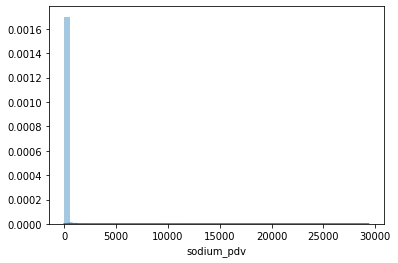

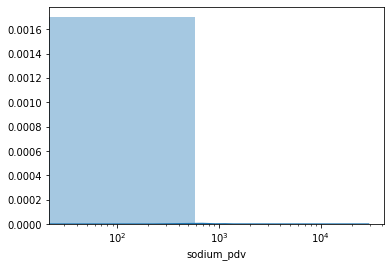

In [ ]:
sodium_check = RealityChecker(PP_RECIPES_DF, 'sodium_pdv') 
sodium_check.preform_check()

In [ ]:
sodium_check.check_range_portion(0, 100)

The range of 0 to 100 (inclusive) in the sodium_pdv column is 0.9592595310766414 of the records


0          0.0
1         17.0
2         48.0
3          2.0
4         23.0
          ... 
231632    26.0
231633    58.0
231634     3.0
231635    11.0
231636     4.0
Name: sodium_pdv, Length: 228928, dtype: float64
0.0
Reality Check For sodium_pdv Column
Description of Column:
count    228928.000000
mean         23.710948
std          28.676783
min           0.000000
25%           5.000000
50%          14.000000
75%          32.000000
max         200.000000
Name: sodium_pdv, dtype: float64

 There Are 201 unique values. Their Frequency list:
0.0      19841
1.0       9557
2.0       9014
3.0       8636
4.0       8089
         ...  
180.0       24
184.0       23
187.0       22
186.0       21
189.0       15
Name: sodium_pdv, Length: 201, dtype: int64


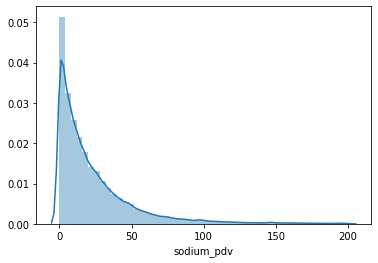

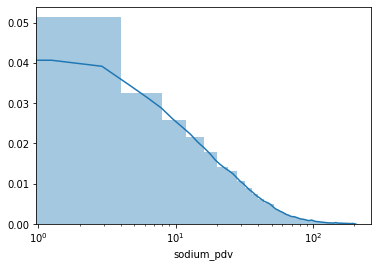

In [ ]:
main_sodium = RealityChecker(PP_RECIPES_DF.loc[(PP_RECIPES_DF['sodium_pdv'] >= 0) & (PP_RECIPES_DF['sodium_pdv'] <= 200)] , 'sodium_pdv').preform_check()

7         275.0
123       260.0
369       788.0
390       260.0
434       237.0
          ...  
231378    220.0
231541    592.0
231569    475.0
231583    715.0
231609    209.0
Name: sodium_pdv, Length: 2709, dtype: float64
275.0
Reality Check For sodium_pdv Column
Description of Column:
count     2709.000000
mean       574.076412
std       1058.560751
min        201.000000
25%        235.000000
50%        299.000000
75%        499.000000
max      29338.000000
Name: sodium_pdv, dtype: float64

 There Are 689 unique values. Their Frequency list:
292.0     35
205.0     32
295.0     30
223.0     30
224.0     30
          ..
408.0      1
440.0      1
568.0      1
424.0      1
1309.0     1
Name: sodium_pdv, Length: 689, dtype: int64


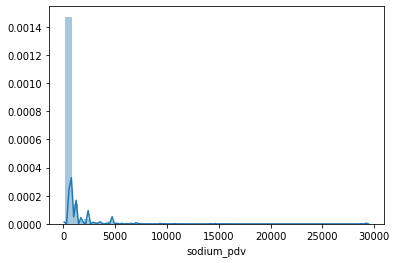

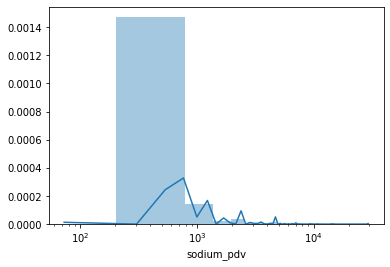

In [ ]:
tail_sodium = RealityChecker(PP_RECIPES_DF.loc[(PP_RECIPES_DF['sodium_pdv'] > 200)] , 'sodium_pdv').preform_check()

## Protein (PDV)

0          2.0
1         22.0
2         39.0
3         14.0
4          3.0
          ... 
231632    44.0
231633     1.0
231634     6.0
231635     7.0
231636     4.0
Name: protein_pdv, Length: 231637, dtype: float64
2.0
Reality Check For protein_pdv Column
Description of Column:
count    231637.00000
mean         34.68186
std          58.47248
min           0.00000
25%           7.00000
50%          18.00000
75%          51.00000
max        6552.00000
Name: protein_pdv, dtype: float64

 There Are 632 unique values. Their Frequency list:
0.0       9837
2.0       8263
3.0       8013
5.0       7982
1.0       7853
          ... 
2242.0       1
2637.0       1
2638.0       1
2238.0       1
1023.0       1
Name: protein_pdv, Length: 632, dtype: int64


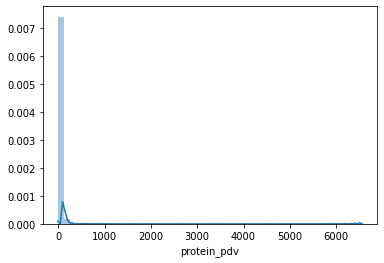

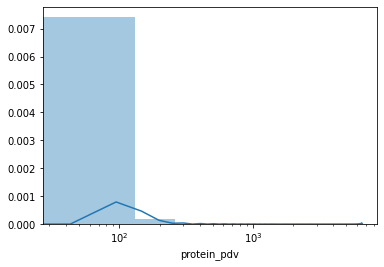

In [ ]:
protein_check = RealityChecker(PP_RECIPES_DF, 'protein_pdv') 
protein_check.preform_check()

In [ ]:
protein_check.check_range_portion(0, 180)

The range of 0 to 180 (inclusive) in the protein_pdv column is 0.9888748343313029 of the records


0          2.0
1         22.0
2         39.0
3         14.0
4          3.0
          ... 
231632    44.0
231633     1.0
231634     6.0
231635     7.0
231636     4.0
Name: protein_pdv, Length: 229018, dtype: float64
2.0
Reality Check For protein_pdv Column
Description of Column:
count    229018.000000
mean         31.509344
std          33.488032
min           0.000000
25%           6.000000
50%          18.000000
75%          49.000000
max         179.000000
Name: protein_pdv, dtype: float64

 There Are 180 unique values. Their Frequency list:
0.0      9837
2.0      8263
3.0      8013
5.0      7982
1.0      7853
         ... 
162.0      48
175.0      45
159.0      45
178.0      44
176.0      43
Name: protein_pdv, Length: 180, dtype: int64


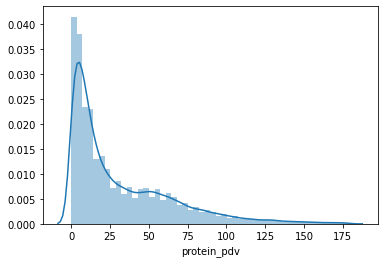

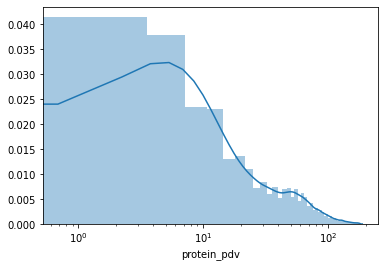

In [ ]:
main_protein = RealityChecker(PP_RECIPES_DF.loc[(PP_RECIPES_DF['protein_pdv']>=0) & (PP_RECIPES_DF['protein_pdv'] < 180)] , 'protein_pdv').preform_check()

55        182.0
96        228.0
298       222.0
390       263.0
463       215.0
          ...  
230368    266.0
230671    775.0
230799    183.0
231553    193.0
231583    746.0
Name: protein_pdv, Length: 2577, dtype: float64
182.0
Reality Check For protein_pdv Column
Description of Column:
count    2577.000000
mean      314.254948
std       358.203978
min       181.000000
25%       200.000000
50%       229.000000
75%       299.000000
max      6552.000000
Name: protein_pdv, dtype: float64

 There Are 451 unique values. Their Frequency list:
199.0     40
193.0     39
188.0     39
181.0     39
185.0     38
          ..
3961.0     1
2929.0     1
530.0      1
421.0      1
2246.0     1
Name: protein_pdv, Length: 451, dtype: int64


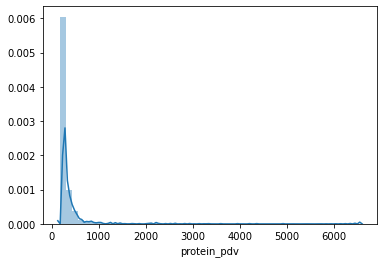

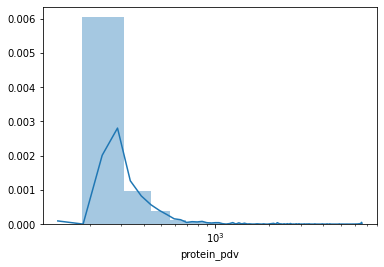

In [ ]:
tail_protein = RealityChecker(PP_RECIPES_DF.loc[(PP_RECIPES_DF['protein_pdv']>180)] , 'protein_pdv').preform_check()

## Saturated fat (PDV)

0          0.0
1         35.0
2         27.0
3          8.0
4          0.0
          ... 
231632    21.0
231633     0.0
231634     5.0
231635    21.0
231636    11.0
Name: saturated_fat_pdv, Length: 231637, dtype: float64
0.0
Reality Check For saturated_fat_pdv Column
Description of Column:
count    231637.000000
mean         45.589150
std          98.235758
min           0.000000
25%           7.000000
50%          23.000000
75%          52.000000
max       10395.000000
Name: saturated_fat_pdv, dtype: float64

 There Are 1197 unique values. Their Frequency list:
0.0       19732
1.0        6715
2.0        6545
3.0        6307
4.0        5927
          ...  
1176.0        1
2156.0        1
1261.0        1
1263.0        1
1781.0        1
Name: saturated_fat_pdv, Length: 1197, dtype: int64


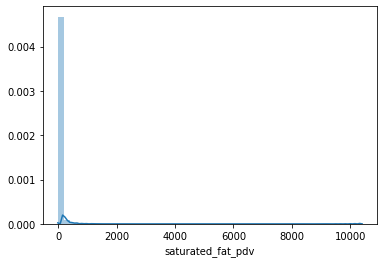

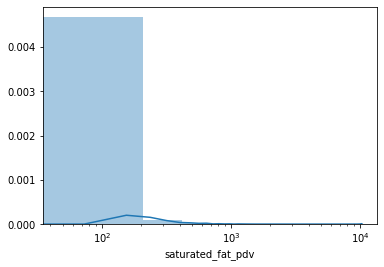

In [ ]:
saturated_fat_check = RealityChecker(PP_RECIPES_DF, 'saturated_fat_pdv') 
saturated_fat_check.preform_check()

In [ ]:
saturated_fat_check.check_range_portion(0, 150)

The range of 0 to 150 (inclusive) in the saturated_fat_pdv column is 0.9525852950953432 of the records


0          0.0
1         35.0
2         27.0
3          8.0
4          0.0
          ... 
231632    21.0
231633     0.0
231634     5.0
231635    21.0
231636    11.0
Name: saturated_fat_pdv, Length: 220490, dtype: float64
0.0
Reality Check For saturated_fat_pdv Column
Description of Column:
count    220490.000000
mean         31.243997
std          32.183233
min           0.000000
25%           6.000000
50%          20.000000
75%          46.000000
max         149.000000
Name: saturated_fat_pdv, dtype: float64

 There Are 150 unique values. Their Frequency list:
0.0      19732
1.0       6715
2.0       6545
3.0       6307
4.0       5927
         ...  
138.0      136
142.0      135
139.0      133
144.0      124
143.0      120
Name: saturated_fat_pdv, Length: 150, dtype: int64


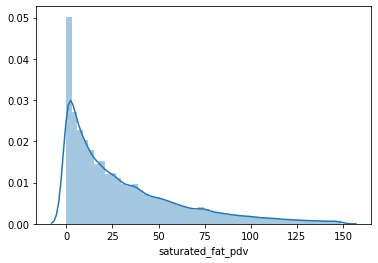

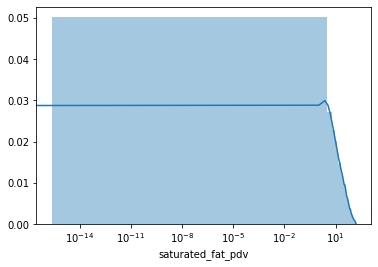

In [ ]:
main_saturated_fat = RealityChecker(PP_RECIPES_DF.loc[(PP_RECIPES_DF['saturated_fat_pdv']>=0) & (PP_RECIPES_DF['saturated_fat_pdv'] < 150)] , 'saturated_fat_pdv').preform_check()


8         431.0
9         310.0
23        158.0
24        417.0
29        214.0
          ...  
231537    213.0
231553    296.0
231608    250.0
231609    217.0
231624    152.0
Name: saturated_fat_pdv, Length: 10983, dtype: float64
431.0
Reality Check For saturated_fat_pdv Column
Description of Column:
count    10983.000000
mean       332.017208
std        310.497026
min        151.000000
25%        178.000000
50%        231.000000
75%        363.000000
max      10395.000000
Name: saturated_fat_pdv, dtype: float64

 There Are 1046 unique values. Their Frequency list:
153.0     146
152.0     131
155.0     125
151.0     125
156.0     121
         ... 
1043.0      1
1760.0      1
562.0       1
895.0       1
1954.0      1
Name: saturated_fat_pdv, Length: 1046, dtype: int64


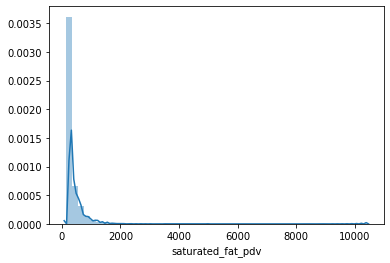

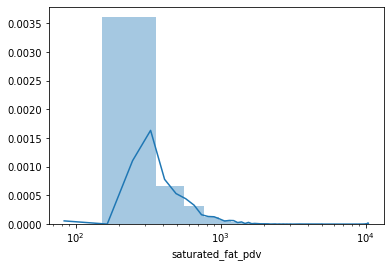

In [ ]:
tail_saturated_fat = RealityChecker(PP_RECIPES_DF.loc[(PP_RECIPES_DF['saturated_fat_pdv']>150)] , 'saturated_fat_pdv').preform_check()

## Carbohydrates (PDV) ##

0          4.0
1          1.0
2          5.0
3         20.0
4         28.0
          ... 
231632    15.0
231633     1.0
231634     0.0
231635     9.0
231636     6.0
Name: carbohydrates_pdv, Length: 231637, dtype: float64
4.0
Reality Check For carbohydrates_pdv Column
Description of Column:
count    231637.000000
mean         15.560403
std          81.824560
min           0.000000
25%           4.000000
50%           9.000000
75%          16.000000
max       36098.000000
Name: carbohydrates_pdv, dtype: float64

 There Are 513 unique values. Their Frequency list:
2.0      14219
3.0      13828
1.0      13617
4.0      13316
0.0      13068
         ...  
504.0        1
621.0        1
611.0        1
449.0        1
639.0        1
Name: carbohydrates_pdv, Length: 513, dtype: int64


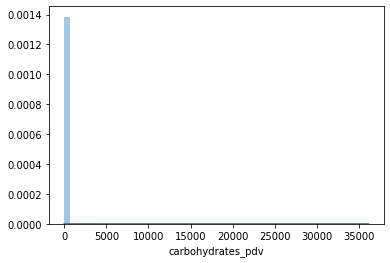

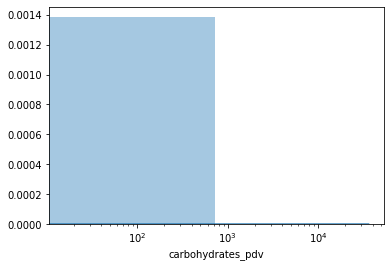

In [ ]:
carbohydrates_check = RealityChecker(PP_RECIPES_DF, 'carbohydrates_pdv') 
carbohydrates_check.preform_check()

In [ ]:
carbohydrates_check.check_range_portion(0, 60)

The range of 0 to 60 (inclusive) in the carbohydrates_pdv column is 0.9651480549307753 of the records


0          4.0
1          1.0
2          5.0
3         20.0
4         28.0
          ... 
231632    15.0
231633     1.0
231634     0.0
231635     9.0
231636     6.0
Name: carbohydrates_pdv, Length: 223564, dtype: float64
4.0
Reality Check For carbohydrates_pdv Column
Description of Column:
count    223564.000000
mean         10.882289
std           9.940074
min           0.000000
25%           4.000000
50%           8.000000
75%          15.000000
max          60.000000
Name: carbohydrates_pdv, dtype: float64

 There Are 61 unique values. Their Frequency list:
2.0     14219
3.0     13828
1.0     13617
4.0     13316
0.0     13068
        ...  
57.0      160
56.0      151
59.0      148
58.0      147
60.0      137
Name: carbohydrates_pdv, Length: 61, dtype: int64


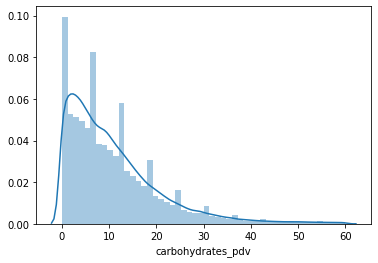

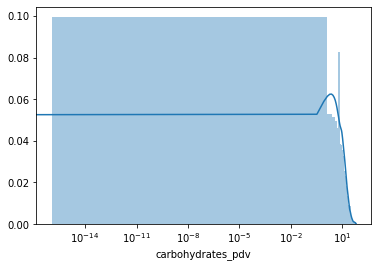

In [ ]:
main_carbo = RealityChecker(PP_RECIPES_DF.loc[(PP_RECIPES_DF['carbohydrates_pdv']>=0) & (PP_RECIPES_DF['carbohydrates_pdv'] <= 60)], 'carbohydrates_pdv').preform_check()

8         220.0
9         138.0
32         78.0
47        188.0
90        132.0
          ...  
231570     92.0
231577     74.0
231583    583.0
231609     71.0
231610     96.0
Name: carbohydrates_pdv, Length: 8073, dtype: float64
220.0
Reality Check For carbohydrates_pdv Column
Description of Column:
count     8073.000000
mean       145.110492
std        414.729743
min         61.000000
25%         81.000000
50%        114.000000
75%        163.000000
max      36098.000000
Name: carbohydrates_pdv, dtype: float64

 There Are 452 unique values. Their Frequency list:
64.0     129
63.0     128
62.0     125
71.0     122
66.0     120
        ... 
455.0      1
421.0      1
529.0      1
492.0      1
579.0      1
Name: carbohydrates_pdv, Length: 452, dtype: int64


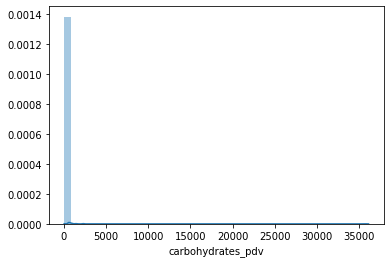

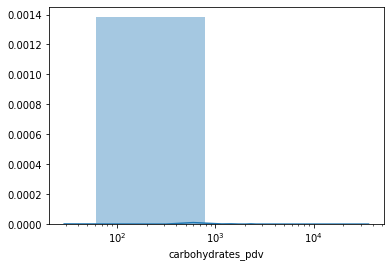

In [ ]:
tail_carbo = RealityChecker(PP_RECIPES_DF.loc[(PP_RECIPES_DF['carbohydrates_pdv'] > 60)], 'carbohydrates_pdv').preform_check()

## Is Tagged Vegetarian ##

In [ ]:
IS_VEGETARIAN_COL_NAME = "is_vegetarian_tags"
MEAT_TAGS_AMOUNT_COL_NAME = "meat_tags_num"
FISH_TAGS_AMOUNT_COL_NAME = "fish_tags_num"
SEAFOORD_TAGS_AMOUNT_COL_NAME = "seafood_tags_num"

**Vegetarian tags intersection with Meat tags**

In [ ]:
vegetarian_checker = RealityChecker(PP_RECIPES_DF, IS_VEGETARIAN_COL_NAME)
vegetarian_checker.show_table(IS_VEGETARIAN_COL_NAME, MEAT_TAGS_AMOUNT_COL_NAME)

0          True
1         False
2         False
3         False
4          True
          ...  
231632    False
231633     True
231634    False
231635    False
231636    False
Name: is_vegetarian_tags, Length: 231637, dtype: bool
True


meat_tags_num,0,1,2,3,4,5,6,7,8
is_vegetarian_tags,,,,,,,,,
False,139927,2621,10441,28992,12237,1334,381,38,10
True,35632,12,0,7,4,1,0,0,0


In [ ]:
PP_RECIPES_DF.loc[(PP_RECIPES_DF[IS_VEGETARIAN_COL_NAME]) & (PP_RECIPES_DF[MEAT_TAGS_AMOUNT_COL_NAME] > 0)].tags.tolist()

["['seafood', 'dietary', 'meat', 'diabetic', 'asian', 'stir-fry', 'cuisine', 'time-to-make', 'course', 'vegetarian', 'comfort-food', 'main-ingredient', 'easy', 'technique', 'preparation', 'thai', 'taste-mood', 'weeknight', 'occasion', 'main-dish', 'curries', 'from-scratch', '60-minutes-or-less']",
 "['vegetables', 'low-fat', 'stove-top', 'low-protein', 'spicy', 'pasta-rice-and-grains', 'poultry', 'dietary', 'low-saturated-fat', 'beginner-cook', 'seasonal', 'meat', 'cuisine', 'north-american', 'time-to-make', 'low-calorie', 'healthy-2', 'american', 'stews', 'new-years', 'low-in-something', 'course', 'vegetarian', 'low-cholesterol', 'equipment', 'comfort-food', 'presentation', 'main-ingredient', 'holiday-event', 'easy', 'grains', 'southwestern-united-states', 'preparation', 'dinner-party', 'inexpensive', 'served-hot', 'superbowl', 'taste-mood', 'occasion', 'healthy', 'winter', 'main-dish', 'chicken', 'pork', 'fall', '60-minutes-or-less']",
 "['vegan', 'for-large-groups', 'poultry', 'diet

**Vegetarian tags intersection with Fish tags**

In [ ]:
vegetarian_checker.show_table(IS_VEGETARIAN_COL_NAME, FISH_TAGS_AMOUNT_COL_NAME)

fish_tags_num,0,1,2,3,4,5,6
is_vegetarian_tags,,,,,,,
False,181793,8011,820,4916,345,77,19
True,35645,8,0,1,1,1,0


**Vegetarian tags intersection with Seafood tags**

In [ ]:
vegetarian_checker.show_table(IS_VEGETARIAN_COL_NAME, SEAFOORD_TAGS_AMOUNT_COL_NAME)

seafood_tags_num,0,1,2,3,4,5,6,7
is_vegetarian_tags,,,,,,,,
False,181207,7993,6346,367,61,3,2,2
True,35639,15,2,0,0,0,0,0


## Is Tagged Vegan##

In [ ]:
IS_VEGAN_COL_NAME = "is_vegan_tag"

MEAT_TAGS_AMOUNT_COL_NAME = "meat_tags_num"
FISH_TAGS_AMOUNT_COL_NAME = "fish_tags_num"
SEAFOORD_TAGS_AMOUNT_COL_NAME = "seafood_tags_num"

**Vegan tags intersection with Meat tags**

In [ ]:
vegan_checker = RealityChecker(PP_RECIPES_DF, IS_VEGAN_COL_NAME)
vegan_checker.show_table(IS_VEGAN_COL_NAME, MEAT_TAGS_AMOUNT_COL_NAME)


0         False
1         False
2         False
3         False
4         False
          ...  
231632    False
231633     True
231634    False
231635    False
231636    False
Name: is_vegan_tag, Length: 231637, dtype: bool
False


meat_tags_num,0,1,2,3,4,5,6,7,8
is_vegan_tag,,,,,,,,,
False,165553,2629,10441,28998,12241,1334,381,38,10
True,10006,4,0,1,0,1,0,0,0


**Vegan tags intersection with Fish tags**

In [ ]:
vegan_checker.show_table(IS_VEGAN_COL_NAME, FISH_TAGS_AMOUNT_COL_NAME)

fish_tags_num,0,1,2,3,4,5,6
is_vegan_tag,,,,,,,
False,207427,8018,820,4917,346,78,19
True,10011,1,0,0,0,0,0


**Vegan tags intersection with Seafood tags**

In [ ]:
vegan_checker.show_table(IS_VEGAN_COL_NAME, SEAFOORD_TAGS_AMOUNT_COL_NAME)

seafood_tags_num,0,1,2,3,4,5,6,7
is_vegan_tag,,,,,,,,
False,206836,8006,6348,367,61,3,2,2
True,10010,2,0,0,0,0,0,0
